# Train Model

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ucl_match_data.csv")
df.columns

Index(['Date', 'Venue', 'Result', 'GF', 'GA', 'xG', 'xGA', 'Poss', 'Sh', 'SoT',
       'Dist', 'FK', 'PK', 'PKatt', 'Team ID', 'Opponent ID', 'Points',
       'Goal Difference', 'xG Difference', 'Shot Accuracy'],
      dtype='object')

In [241]:
# Define the features of interest
features = ['Points','GF', 'GA', 'xG', 'xGA', 'Sh', 'SoT', 'Goal Difference', 'xG Difference', 'Shot Accuracy', 'Poss', 'FK', 'PK', 'PKatt']

# Compute mean and variance for each team
team_stats = df.groupby("Team ID")[features].agg(['mean', 'var'])

# Flatten column names
team_stats.columns = ['_'.join(col).strip() for col in team_stats.columns]
team_stats.reset_index(inplace=True)

# Merge to get team statistics
df = df.merge(team_stats, on="Team ID", how="left")

# Rename columns for clarity
team_col_map = {col: "Team_" + col for col in team_stats.columns if col != "Team ID"}
df.rename(columns=team_col_map, inplace=True)

# Merge to get opponent statistics
df = df.merge(team_stats, left_on="Opponent ID", right_on="Team ID", how="left", suffixes=('', '_Opponent'))

# Drop the redundant Team ID column from the second merge
df.drop(columns=["Team ID_Opponent"], inplace=True)

# Rename opponent columns
opponent_col_map = {col: "Opponent_" + col for col in team_stats.columns if col != "Team ID"}
df.rename(columns=opponent_col_map, inplace=True)

# Save the processed dataset
df.to_csv("processed_dataset.csv", index=False)

# Display final dataframe
df.head()

,Date,Venue,Result,GF,GA,xG,xGA,Poss,Sh,SoT,...,Opponent_Shot Accuracy_mean,Opponent_Shot Accuracy_var,Opponent_Poss_mean,Opponent_Poss_var,Opponent_FK_mean,Opponent_FK_var,Opponent_PK_mean,Opponent_PK_var,Opponent_PKatt_mean,Opponent_PKatt_var
0,2024-09-17,Away,W,3.0,1.0,3.1,0.6,51.0,23.0,11.0,...,0.377911,0.016738,52.625,70.553571,0.875,1.553571,0.000,0.000,0.000,0.000000
1,2024-10-02,Home,W,2.0,0.0,1.2,0.6,51.0,9.0,4.0,...,0.277804,0.013412,49.250,17.928571,0.375,0.267857,0.000,0.000,0.000,0.000000
2,2024-10-23,Away,W,1.0,0.0,2.3,0.8,57.0,17.0,7.0,...,0.360014,0.019136,47.500,35.142857,0.625,0.553571,0.125,0.125,0.125,0.125000
3,2024-11-05,Home,W,4.0,0.0,3.7,0.9,47.0,22.0,8.0,...,0.381183,0.007250,59.125,66.982143,0.500,0.857143,0.125,0.125,0.125,0.125000
4,2024-11-27,Home,W,2.0,0.0,2.7,1.2,63.0,16.0,7.0,...,0.419154,0.007479,52.875,107.553571,0.375,0.267857,0.125,0.125,0.250,0.214286


<ipython-input-242-74b386b863c8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="coolwarm")


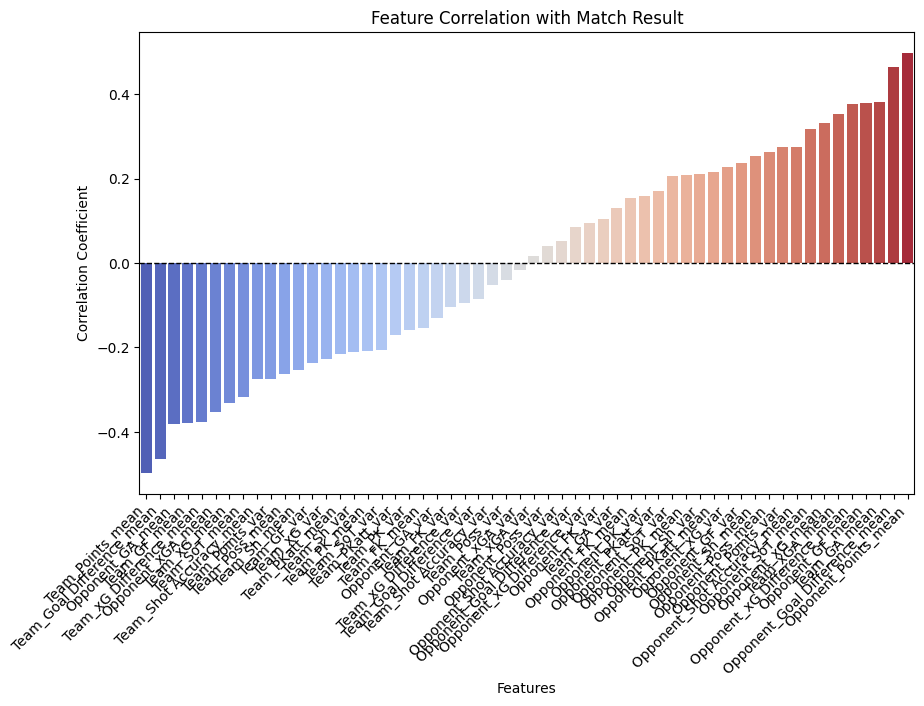

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_cols = [col for col in df.columns if ('mean' in col or 'var' in col) and ('Team_' in col or 'Opponent_' in col)]
target = 'Result'

result_mapping = {
    'W': 1,  # Win
    'D': 2,  # Draw
    'L': 3  # Loss
}

reverse_result_mapping = {v: k for k, v in result_mapping.items()}


df['Result'] = df['Result'].map(result_mapping)

# Compute correlation of features with target variable ('Result')
corr_with_target = df[feature_cols + ['Result']].corr()['Result'].drop('Result').sort_values()

# Plot bar chart for feature-target correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("Feature Correlation with Match Result")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()

Selected Features (Above |0.15| correlation): ['Team_Points_mean', 'Team_Goal Difference_mean', 'Opponent_GA_mean', 'Team_GF_mean', 'Team_xG Difference_mean', 'Opponent_xGA_mean', 'Team_xG_mean', 'Team_SoT_mean', 'Team_Shot Accuracy_mean', 'Team_Points_var', 'Team_Poss_mean', 'Team_Sh_mean', 'Team_GF_var', 'Team_xG_var', 'Team_PKatt_mean', 'Team_Sh_var', 'Team_PK_mean', 'Team_SoT_var', 'Team_PKatt_var', 'Team_PK_var', 'Team_FK_mean', 'Opponent_FK_mean', 'Opponent_PK_var', 'Opponent_PKatt_var', 'Opponent_SoT_var', 'Opponent_PK_mean', 'Opponent_Sh_var', 'Opponent_PKatt_mean', 'Opponent_xG_var', 'Opponent_GF_var', 'Opponent_Sh_mean', 'Opponent_Poss_mean', 'Opponent_Points_var', 'Opponent_Shot Accuracy_mean', 'Opponent_SoT_mean', 'Opponent_xG_mean', 'Team_xGA_mean', 'Opponent_xG Difference_mean', 'Opponent_GF_mean', 'Team_GA_mean', 'Opponent_Goal Difference_mean', 'Opponent_Points_mean']


<ipython-input-243-dd7dce293cf9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target[selected_features].index, y=corr_with_target[selected_features].values, palette="coolwarm")


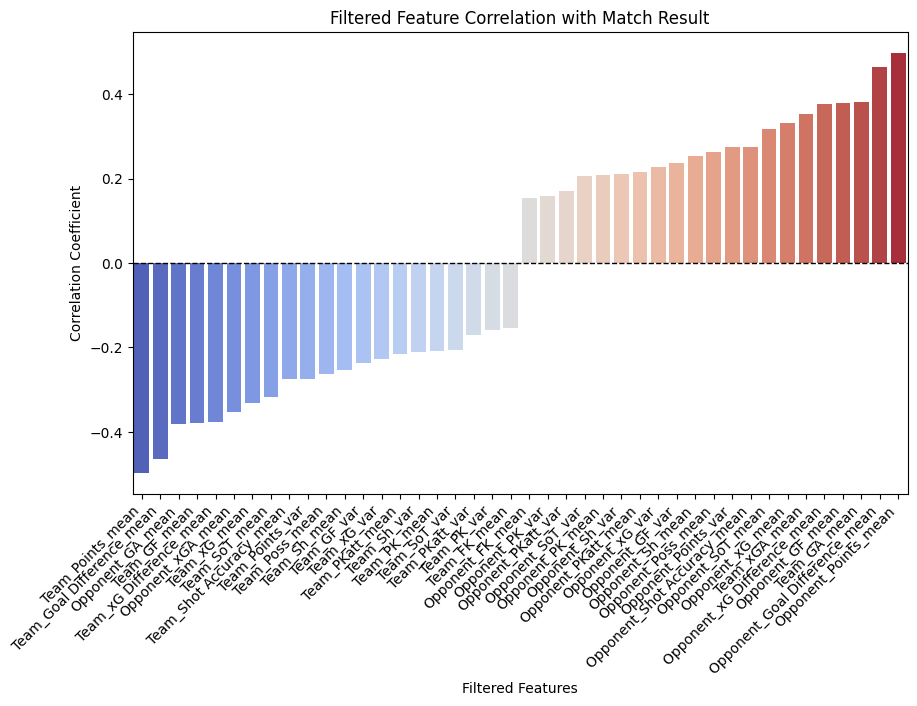

In [243]:
# Define correlation threshold (remove weak correlations)
threshold = 0.15
selected_features = corr_with_target[abs(corr_with_target) >= threshold].index.tolist()

print(f"Selected Features (Above |{threshold}| correlation): {selected_features}")

# Plot updated feature-target correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_target[selected_features].index, y=corr_with_target[selected_features].values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='black', linestyle='dashed', linewidth=1)
plt.title("Filtered Feature Correlation with Match Result")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Filtered Features")
plt.show()


In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

target = "Result"

# Split data into training and testing sets
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Initialize and train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=47)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the model: 0.71

Classification Report:
              precision    recall  f1-score   support

           1       0.61      0.90      0.73        21
           2       1.00      0.12      0.22         8
           3       0.81      0.72      0.76        29

    accuracy                           0.71        58
   macro avg       0.81      0.58      0.57        58
weighted avg       0.76      0.71      0.68        58



In [245]:
def handle_draw_with_penalties(prediction):
    if prediction == 'D':
        pen_result = np.random.choice(['W', 'L'])
        print("After Penalties: " + pen_result)
        return pen_result
    else:
        return prediction

# Aggregate previous matches statistics for each team
def aggregate_team_stats(team_id, df):

    team_features = [feature for feature in feature_cols if feature.startswith("Team_")]
    # Filter matches for the team
    team_matches = df[df['Team ID'] == team_id]

    aggregated_stats = team_matches[team_features].iloc[0]

    return aggregated_stats

def predict_match_result(team_id_1, team_id_2):
    # Get aggregated stats for both teams
    team_1_data = aggregate_team_stats(team_id_1, df)
    team_2_data = aggregate_team_stats(team_id_2, df)

    # Rename the columns of team_2_data to remove "Team_" and add "Opponent_" prefix
    team_2_data = team_2_data.rename(lambda x: f"Opponent_{x.replace('Team_', '')}", axis=0)

    # Initialize an empty dictionary to store the combined features
    input_features = {}

    # Add Team 1's and Team 2's features to the input dictionary
    for feature in selected_features:
        if feature.startswith("Team_"):
            input_features[feature] = team_1_data[feature]

        elif feature.startswith("Opponent_"):
            input_features[feature] = team_2_data[feature]

    # Convert input features into a DataFrame for prediction
    input_df = pd.DataFrame([input_features])

    # Predict match outcome
    predicted_outcome = model.predict(input_df)[0]

    # Convert numeric prediction back to categorical
    predicted_result = reverse_result_mapping.get(predicted_outcome, "N/A")

    return predicted_result

In [246]:
team_1_id = 1  # Barcelona FC
team_2_id = 0  # Liverpool FC

match_result = predict_match_result(team_1_id, team_2_id)

print(f"Predicted match result: {match_result}")

match_result = handle_draw_with_penalties(match_result)

Predicted match result: W


# Tournament Prediction

### Team IDs

In [247]:
team_map = {
    0: 'Liverpool',
    1: 'Barcelona',
    2: 'Arsenal',
    3: 'Internazionale',
    4: 'Atletico Madrid',
    5: 'Bayer Leverkusen',
    6: 'Lille',
    7: 'Aston Villa',
    8: 'Atalanta',
    9: 'Dortmund',
    10: 'Real Madrid',
    11: 'Bayern Munich',
    12: 'Milan',
    13: 'PSV Eindhoven',
    14: 'Paris Saint-Germain',
    15: 'Benfica',
    16: 'Monaco',
    17: 'Brest',
    18: 'Feyenoord',
    19: 'Juventus',
    20: 'Celtic',
    21: 'Manchester City',
    22: 'Sporting CP',
    23: 'Club Brugge',
    24: 'Dinamo Zagreb',
    25: 'Stuttgart',
    26: 'Shakhtar Donetsk',
    27: 'Bologna',
    28: 'Red Star Belgrade',
    29: 'Sturm Graz',
    30: 'Sparta Prague',
    31: 'RB Leipzig',
    32: 'Girona',
    33: 'Red Bull Salzburg',
    34: 'Slovan Bratislava',
    35: 'Young Boys'
}

# Function to map team ID to team name
def get_team_name(team_id):
    return team_map.get(team_id, 'Unknown Team')

def get_team_id(team_name):
    for team_id, name in team_map.items():
        if name == team_name:
            return team_id
    return None

## Simulate Tournament

### Playoffs

In [248]:
playoffs = {
    1: ("Paris Saint-Germain", "Brest"),
    2: ("Atalanta", "Club Brugge"),
    3: ("Real Madrid", "Manchester City"),
    4: ("Juventus", "PSV Eindhoven"),
    5: ("Benfica", "Monaco"),
    6: ("Sporting CP", "Dortmund"),
    7: ("Bayern Munich", "Celtic"),
    8: ("Milan", "Feyenoord"),
}

# Simulate the playoffs round and store winners
winners_playoffs = {}
print("Simulating Playoffs:\n")
for match_id, teams in playoffs.items():
    print(f"Playoff {match_id}: {teams[0]} vs {teams[1]}")

    result = predict_match_result(get_team_id(teams[0]), get_team_id(teams[1]))

    print_result = "Winner of Playoff " + str(match_id) + ": "
    if result == "D":
        winner = np.random.choice([teams[0], teams[1]])
        print_result += str(winner) + " (after penalties)"

    elif result == "W":
        winner = teams[0]
        print_result += (winner)

    elif result == "L":
        winner = teams[1]
        print_result += (winner)

    winners_playoffs[match_id] = winner
    print(print_result + "\n")



Simulating Playoffs:

Playoff 1: Paris Saint-Germain vs Brest
Winner of Playoff 1: Brest

Playoff 2: Atalanta vs Club Brugge
Winner of Playoff 2: Atalanta

Playoff 3: Real Madrid vs Manchester City
Winner of Playoff 3: Real Madrid

Playoff 4: Juventus vs PSV Eindhoven
Winner of Playoff 4: Juventus

Playoff 5: Benfica vs Monaco
Winner of Playoff 5: Benfica

Playoff 6: Sporting CP vs Dortmund
Winner of Playoff 6: Sporting CP

Playoff 7: Bayern Munich vs Celtic
Winner of Playoff 7: Bayern Munich

Playoff 8: Milan vs Feyenoord
Winner of Playoff 8: Milan



### Round of 16

In [249]:
round_of_16 = {
    1: ("Liverpool", winners_playoffs[1]),
    2: ("Barcelona", winners_playoffs[5]),
    3: ("Arsenal", winners_playoffs[4]),
    4: ("Internazionale", winners_playoffs[8]),
    5: ("Atletico Madrid", winners_playoffs[3]),
    6: ("Bayer Leverkusen", winners_playoffs[7]),
    7: ("Lille", winners_playoffs[2]),
    8: ("Aston Villa", winners_playoffs[6]),
}

# Simulate the round of 16 and store winners
winners_rnd_16 = {}
print("Simulating Round of 16:\n")
for match_id, teams in round_of_16.items():
    print(f"R16 {match_id}: {teams[0]} vs {teams[1]}")

    result = predict_match_result(get_team_id(teams[0]), get_team_id(teams[1]))

    print_result = "Winner of R16 " + str(match_id) + ": "

    if result == "D":
        winner = np.random.choice([teams[0], teams[1]])
        print_result += str(winner) + " (after penalties)"

    elif result == "W":
        winner = teams[0]
        print_result += (winner)

    elif result == "L":
        winner = teams[1]
        print_result += (winner)

    winners_rnd_16[match_id] = winner
    print(print_result + "\n")




Simulating Round of 16:

R16 1: Liverpool vs Brest
Winner of R16 1: Liverpool

R16 2: Barcelona vs Benfica
Winner of R16 2: Barcelona

R16 3: Arsenal vs Juventus
Winner of R16 3: Arsenal

R16 4: Internazionale vs Milan
Winner of R16 4: Internazionale

R16 5: Atletico Madrid vs Real Madrid
Winner of R16 5: Real Madrid

R16 6: Bayer Leverkusen vs Bayern Munich
Winner of R16 6: Bayer Leverkusen

R16 7: Lille vs Atalanta
Winner of R16 7: Lille

R16 8: Aston Villa vs Sporting CP
Winner of R16 8: Aston Villa



### Quarter Finals

In [250]:
quarter_finals = {
    1: (winners_rnd_16[1], winners_rnd_16[7]),
    2: (winners_rnd_16[2], winners_rnd_16[8]),
    3: (winners_rnd_16[5], winners_rnd_16[3]),
    4: (winners_rnd_16[6], winners_rnd_16[4]),
}

# Simulate the quarter finals and store winners
winner_quarter = {}
print("Simulating Quarter Finals:\n")
for match_id, teams in quarter_finals.items():
    print(f"QF {match_id}: {teams[0]} vs {teams[1]}")

    result = predict_match_result(get_team_id(teams[0]), get_team_id(teams[1]))

    print_result = "Winner of QF " + str(match_id) + ": "

    if result == "D":
        winner = np.random.choice([teams[0], teams[1]])
        print_result += str(winner) + " (after penalties)"

    elif result == "W":
        winner = teams[0]
        print_result += (winner)

    elif result == "L":
        winner = teams[1]
        print_result += (winner)

    winner_quarter[match_id] = winner
    print(print_result + "\n")



Simulating Quarter Finals:

QF 1: Liverpool vs Lille
Winner of QF 1: Liverpool

QF 2: Barcelona vs Aston Villa
Winner of QF 2: Barcelona

QF 3: Real Madrid vs Arsenal
Winner of QF 3: Arsenal

QF 4: Bayer Leverkusen vs Internazionale
Winner of QF 4: Bayer Leverkusen



### Semi Final

In [251]:
semi_finals = {
    1: (winner_quarter[1], winner_quarter[3]),
    2: (winner_quarter[2], winner_quarter[4]),
}

# Simulate the semi finals and store winners
winner_semis = {}
print("Simulating Semi Finals:\n")
for match_id, teams in semi_finals.items():
    print(f"SF {match_id}: {teams[0]} vs {teams[1]}")

    result = predict_match_result(get_team_id(teams[0]), get_team_id(teams[1]))

    print_result = "Winner of SF " + str(match_id) + ": "

    if result == "D":
        winner = np.random.choice([teams[0], teams[1]])
        print_result += str(winner) + " (after penalties)"

    elif result == "W":
        winner = teams[0]
        print_result += (winner)

    elif result == "L":
        winner = teams[1]
        print_result += (winner)

    winner_semis[match_id] = winner
    print(print_result + "\n")



Simulating Semi Finals:

SF 1: Liverpool vs Arsenal
Winner of SF 1: Liverpool

SF 2: Barcelona vs Bayer Leverkusen
Winner of SF 2: Barcelona



### Final

In [252]:
final = {
    1: (winner_semis[1], winner_semis[2])
}

# Simulate the final
print("Simulating UCL Final:\n")
for match_id, teams in final.items():
    print(f"Final: {teams[0]} vs {teams[1]}")

    result = predict_match_result(get_team_id(teams[0]), get_team_id(teams[1]))

    print_result = "Champions League Winner: "

    if result == "D":
        winner = np.random.choice([teams[0], teams[1]])
        print_result += str(winner) + " (after penalties)"

    elif result == "W":
        winner = teams[0]
        print_result += (winner)

    elif result == "L":
        winner = teams[1]
        print_result += (winner)
    final_winner = winner
    print(print_result + "\n")
    print("Congratulations to " + winner + "!")

Simulating UCL Final:

Final: Liverpool vs Barcelona
Champions League Winner: Liverpool

Congratulations to Liverpool!


## Display Result

In [253]:
def print_bracket():
    print("Champions League Tournament:\n")

    # Display Playoffs
    print("Playoffs:")
    for i, match in playoffs.items():
        print(f"Playoff {i}: {match[0]} vs {match[1]} -> Winner: {winners_playoffs[i]}")

    # Display Round of 16
    print("\nRound of 16:")
    for i, match in round_of_16.items():
        print(f"Round {i}: {match[0]} vs {match[1]} -> Winner: {winners_rnd_16[i]}")

    # Display Quarterfinals
    print("\nQuarterfinals:")
    for i, match in quarter_finals.items():
        print(f"Quarterfinal {i}: {match[0]} vs {match[1]} -> Winner: {winner_quarter[i]}")

    # Display Semifinals
    print("\nSemifinals:")
    for i, match in semi_finals.items():
        print(f"Semifinal {i}: {match[0]} vs {match[1]} -> Winner: {winner_semis[i]}")

    # Display Final
    print("\nFinal:")
    match = final[1]
    print(f"Final: {match[0]} vs {match[1]} -> Winner: {final_winner}")
    print("\nTournament Complete!")

# Run the printing function
print_bracket()


Champions League Tournament:

Playoffs:
Playoff 1: Paris Saint-Germain vs Brest -> Winner: Brest
Playoff 2: Atalanta vs Club Brugge -> Winner: Atalanta
Playoff 3: Real Madrid vs Manchester City -> Winner: Real Madrid
Playoff 4: Juventus vs PSV Eindhoven -> Winner: Juventus
Playoff 5: Benfica vs Monaco -> Winner: Benfica
Playoff 6: Sporting CP vs Dortmund -> Winner: Sporting CP
Playoff 7: Bayern Munich vs Celtic -> Winner: Bayern Munich
Playoff 8: Milan vs Feyenoord -> Winner: Milan

Round of 16:
Round 1: Liverpool vs Brest -> Winner: Liverpool
Round 2: Barcelona vs Benfica -> Winner: Barcelona
Round 3: Arsenal vs Juventus -> Winner: Arsenal
Round 4: Internazionale vs Milan -> Winner: Internazionale
Round 5: Atletico Madrid vs Real Madrid -> Winner: Real Madrid
Round 6: Bayer Leverkusen vs Bayern Munich -> Winner: Bayer Leverkusen
Round 7: Lille vs Atalanta -> Winner: Lille
Round 8: Aston Villa vs Sporting CP -> Winner: Aston Villa

Quarterfinals:
Quarterfinal 1: Liverpool vs Lille -> W